# Determining the Braiding Index

_Camu Prins_

Determining the active Braiding Index based on the shear stress. The braiding index over time is plotted. For the shear stress the TAUMAX parameter is taken from the trim file.

## 1. Delta visualisation

In [96]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import dfm_tools as dfmt
from interactive import *

trim500 = "Mahakam_500/Mahakam/Mahakam_delta_Netcdf/trim-001.nc"
trih500 = "Mahakam_500/Mahakam/Mahakam_delta_Netcdf/trih-001.nc"

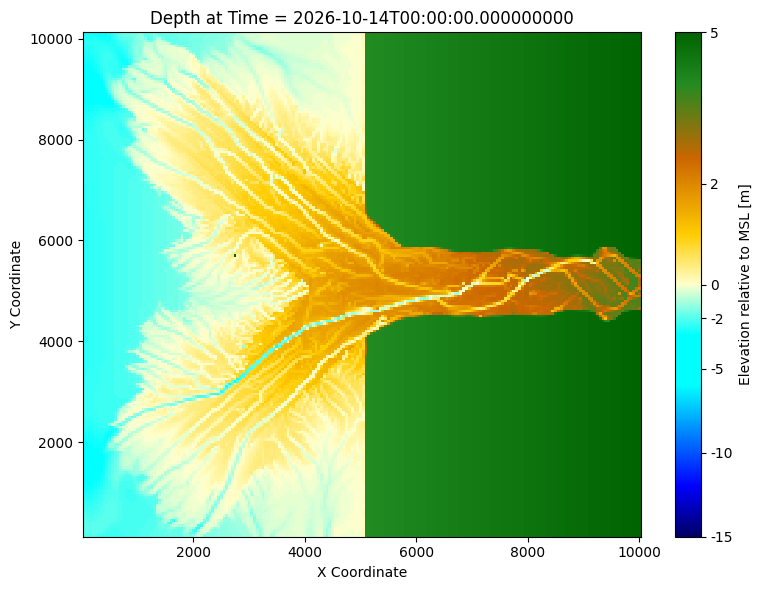

In [99]:
plot_bathymetry_with_colormap(trim500,vmin=-15,vmax=5)

## 2. Braiding Index over time

### 2a. Visualise the cross-sections 

Visualise the rivers by plotting the shear stress and the cross sections

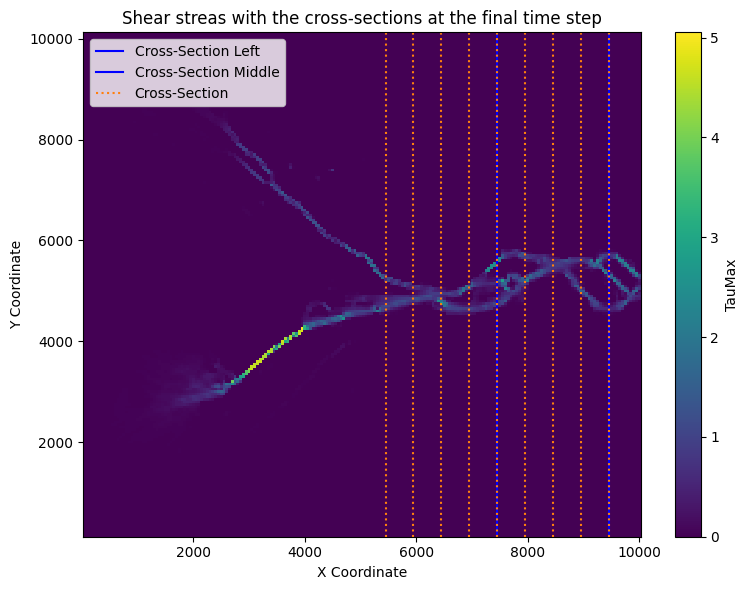

In [124]:
# visualise shear stress
nc_file = trim500
time_index=-1
N_coords = [109, 119, 129, 139, 149, 159, 169, 179, 189]

left_cross = 0
middle_cross = 7   # Indexes for the rivers

# Load the NetCDF file
dataset = xr.open_dataset(nc_file)

# Extract coordinates and depth data
xc = dataset["XCOR"].values
yc = dataset["YCOR"].values
shear = dataset["TAUMAX"]

# Trim the edges
xc_inner = xc[1:-1, 1:-1]
yc_inner = yc[1:-1, 1:-1]
shear_inner = shear[:, 1:-1, 1:-1]   # Flip sign for elevation

# Time values
time_values = dataset["time"].values
shear_at_t = shear_inner[time_index, :, :]

# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.pcolormesh(xc_inner, yc_inner, shear_at_t, shading='auto')

left_x = (109*50)
middle_x = (189*50)

ax.axvline(ds_his.XYTRA[left_cross].values[0], color='b', linestyle='-', label=f'Cross-Section Left')
ax.axvline(ds_his.XYTRA[middle_cross].values[0], color='b', linestyle='-', label=f'Cross-Section Middle')

for i, coord in enumerate(N_coords):
    label = 'Cross-Section' if i == 0 else None
    ax.axvline(coord * 50, color='C1', linestyle=':', label=label)

ax.set_title(f'Shear stress with the cross-sections at the final time step')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')

cb = fig.colorbar(c, ax=ax, orientation='vertical', label='TauMax')
plt.legend()
plt.tight_layout()
plt.show()

dataset.close()

## 2b. Braiding Index

In a loop take a vertical cross-section and threshold it. Then count how many seperate blocks of water there are to count the number of channels. The number of channels is then averaged over all the cross-sections which leads to the Braiding Index.

In [135]:
def count_channels(line1, line2):
    crossings = 0
    for i in range(1, len(line1)):
        if (line1[i-1] > line2[i-1] and line1[i] < line2[i]) or (line1[i-1] < line2[i-1] and line1[i] > line2[i]):
            crossings += 1
    channels = crossings / 2 
    return channels

There is/are 2.0 channels.
There is/are 2.0 channels.


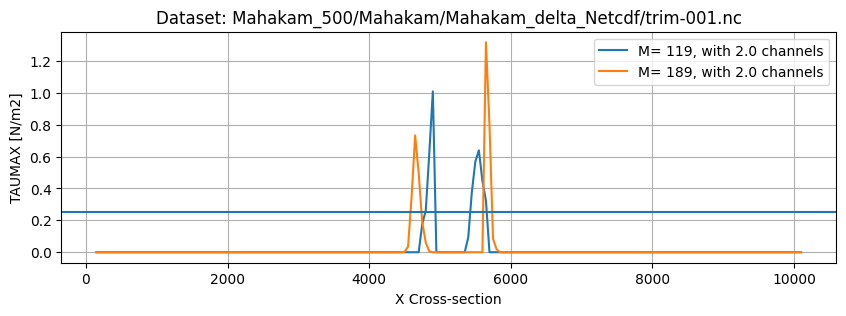

The Braiding Index in this example is 2.0.


In [139]:
# Braiding index over time:
N_coords = [119, 189]
threshold = 0.5 #minimum TAU for river

# Load dataset
dataset = nc.Dataset(trim500, mode='r')
x = dataset.variables["XCOR"][:]
y = dataset.variables["YCOR"][:]
xc_inner = x[1:-1, 1:-1]
yc_inner = y[1:-1, 1:-1]
df_stress = dataset.variables["TAUMAX"][:, 1:-1, 1:-1]

# for delt in range(df_stress.shape[0]):
data = df_stress[100]    # look at an arbitrary time step as an example
    
# Create figure
plt.figure(figsize=(10, 3))
No_channels = 0
for N in N_coords:        # a loop that determines the Tau at each crossection and then countrs the channels
    z_cross = abs(data[N, :])     
    x_cross = yc_inner[N, :]
    masked = z_cross[z_cross > 0.25]
    channels = count_channels(z_cross, [threshold] * len(z_cross))
    print(f"There is/are {channels} channels.")
    plt.plot(x_cross, z_cross, label=f'M= {N}, with {channels} channels')
    No_channels += channels


plt.axhline(threshold)
plt.xlabel('X Cross-section')
plt.ylabel('TAUMAX [N/m2]')
plt.title(f'Dataset: {trim500}')
plt.grid()
plt.legend()

plt.show()

BI = No_channels / len(N_coords)
print(f'The Braiding Index in this example is {BI}.')

### 2b. Braiding Index over time

In [141]:
# Braiding index TAUKSI:
N_coords = [109, 119, 129, 139, 149, 159, 169, 179, 189]
threta = 0.5 #minimum TAU for river

# Load dataset
dataset = nc.Dataset(trim500, mode='r')
x = dataset.variables["XCOR"][:]
y = dataset.variables["YCOR"][:]
xc_inner = x[1:-1, 1:-1]
yc_inner = y[1:-1, 1:-1]
df_stress = dataset.variables["TAUMAX"][:, 1:-1, 1:-1]

BI_total = []
timesteps = df_stress.shape[0]
for delt in range(timesteps):
    data = df_stress[delt]
    No_channels = 0
    for N in N_coords:
        z_cross = abs(data[N, :])
        x_cross = yc_inner[N, :]
        masked = z_cross[z_cross > threta]
        channels = count_channels(z_cross, [threta] * len(z_cross))
        No_channels += channels
    BI = No_channels / len(N_coords)
    BI_total.append(BI)

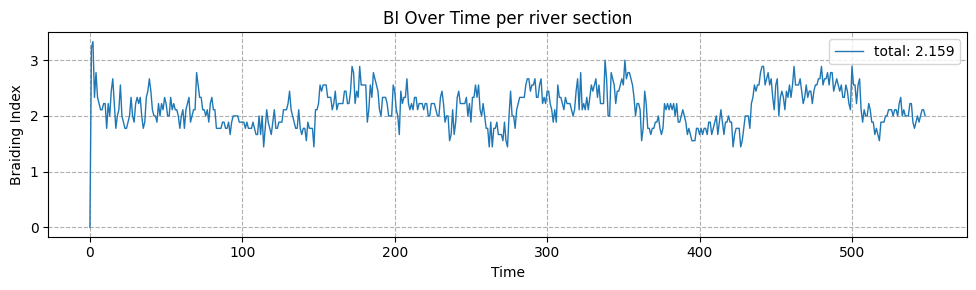

In [143]:
plt.figure(figsize=(10, 3))  # Set the figure size

plt.plot(BI_total, linewidth=1, label=f'Mean: {np.mean(BI_total[1:]):.3f}')  # Main line plot

plt.title('BI Over Time per river section')  
plt.xlabel('Time') 
# plt.xlim(300,500)
plt.ylabel('Braiding Index') 
plt.grid(linestyle='--')
plt.legend() 
plt.tight_layout()
plt.show();